# 20. Hashing
[문제 링크](https://www.acmicpc.net/problem/15829)

In [ ]:
# 알파벳을 숫자로 변환하기 위한 리스트
alpha = ' abcdefghijklmnopqrstuvwxyz'
n = int(input())
s = input()
# 해시 결과를 저장할 변수
hashing_result = 0
for i, s in enumerate(s):
    # 해시 결과에 더할 값을 구하고, 해시 결과에 더함
    hashing_result += (alpha.index(s) * (31 ** i))
# r mod M꼴에서 M은 1234567891이므로, M으로 나눈 나머지를 구함
hashing_result %= 1234567891
print(hashing_result)

## 성공
- 해시함수의 기본 구조에 관한 문제.

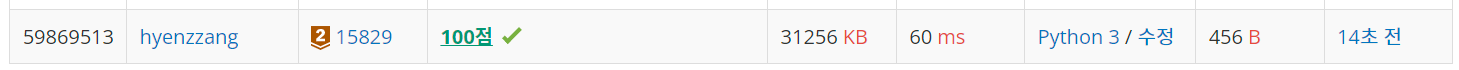

# 21. 완주하지 못한 선수
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42576)

In [ ]:
def solution(participant, completion):
    # 이름순 정렬
    participant.sort()
    completion.sort()
    # 같은 번호끼리 비교시
    # 이름이 달라질 경우
    #  participant에 있는 이름이 완주 못함
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
    return participant[-1]

## 성공
- 이전에 푼 문제.
- 해시테이블을 사용하지 않고 풀이했었음.

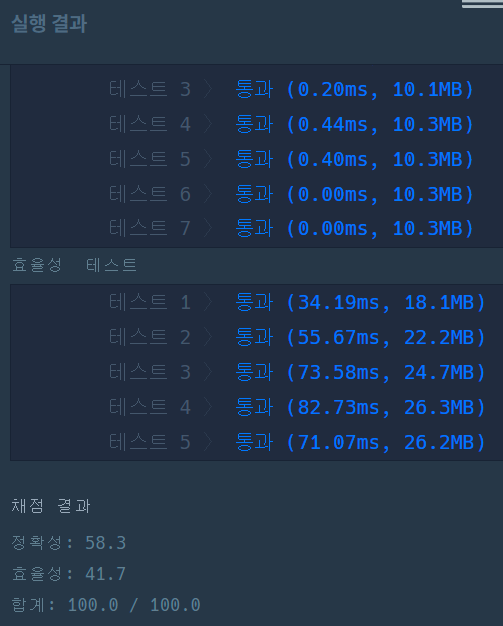

In [ ]:
def solution(participant, completion):
    # 딕셔너리 생성
    dict_ = {}
    # 이름 key, value = 총 명수
    for name in participant:
        dict_[name] = dict_.get(name, 0) + 1
    # 완주한 사람은 -1 -> 0이 되면 삭제
    for name in completion:
        dict_[name] -= 1
        if dict_[name] == 0:
            del dict_[name]
    # 남은 이름이 완주 못한 사람
    answer = list(dict_.keys())[0]
    
    return answer

## 성공
- 해시테이블(딕셔너리)를 사용하여 풀이.
    - 이름을 키값으로 사람수를 저장 -> 완주시 -1
    - 0이되면 해당 값 삭제

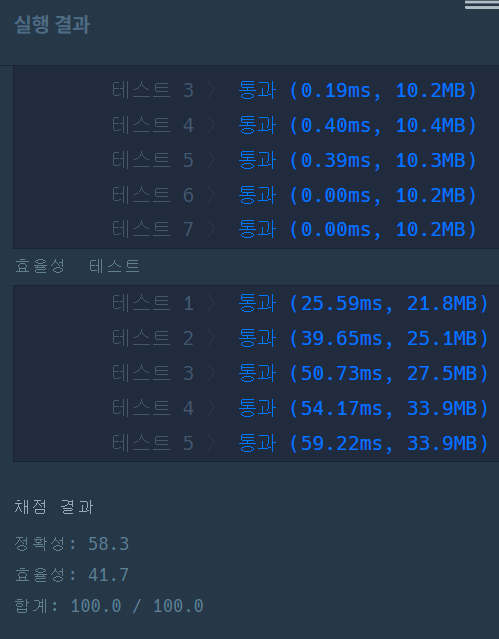

# 22. 전화번호 목록
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42577)

In [13]:
def solution(phone_book):
    answer = True
    # 딕셔너리 생성
    phone_dict = {}
    # 길이 순 정렬 -> 짧은 전화번호부터 딕셔너리에 저장 위함
    phone_book.sort(key=lambda x: len(x))
    # 전화번호부의 전화번호를 하나씩 처리
    for phone in phone_book:
        # 1 ~ 번호 길이까지 반복
        for i in range(1, len(phone)+1):
            # print(f'check {phone} in {phone[:i]}')
            # 번호 길이가 끝까지 반복했을 경우
            if i == len(phone):
                # print(f'add {phone} to dict')
                # 중복된 번호는 없으므로 키를 생성
                phone_dict[phone] = False
                continue
            # 번호를 i개만큼 자른 것이 딕셔너리에 있을 경우
            try:
                # 접두어인 번호가 있으므로 False반환
                check = phone_dict[phone[:i]]
                return False
            except:
                # 접두어인 번호가 없으므로 다음 번호로 넘어감
                continue

    return answer

In [14]:
solution(["119", "97674223", "1195524421"])

check 119 in 1
check 119 in 11
check 119 in 119
add 119 to dict
check 97674223 in 9
check 97674223 in 97
check 97674223 in 976
check 97674223 in 9767
check 97674223 in 97674
check 97674223 in 976742
check 97674223 in 9767422
check 97674223 in 97674223
add 97674223 to dict
check 1195524421 in 1
check 1195524421 in 11
check 1195524421 in 119


False

## 성공
- 짧은 번호부터 딕셔너리에 저장하기 위해 길이순으로 정렬.
    - 정렬을 위해 람다식 활용
- 해시테이블 형식인 딕셔너리의 경우 키값으로 접급할 경우 O(n)이기 때문에, 속도가 빠름.
    - 번호를 앞에서 부터 잘라가며 딕셔너리에 키값으로 존재하는지 확인.
        - 키값으로 접근될 경우 return False
        - 없다고 확인된 번호는 딕셔너리에 키값으로 추가.

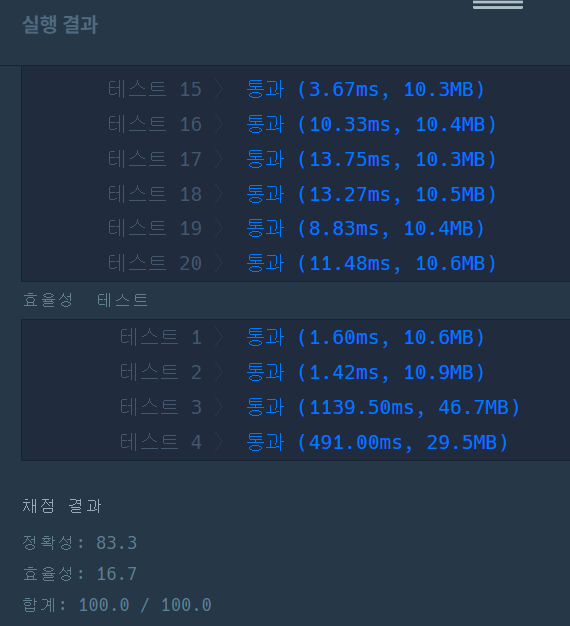

In [15]:
def solution(phone_book):
    answer = True
    # 딕셔너리 생성
    phone_dict = {}
    # 길이 순 정렬 -> 짧은 전화번호부터 딕셔너리에 저장 위함
    phone_book.sort(key=lambda x: len(x))
    # 가장 짧은 번호의 길이
    min_len = len(phone_book[0])
    # 전화번호부의 전화번호를 하나씩 처리
    for phone in phone_book:
        # 가장 짧은 번호의 길이 ~ 번호 길이까지 반복
        for i in range(min_len, len(phone)+1):
            # print(f'check {phone} in {phone[:i]}')
            # 번호 길이가 끝까지 반복했을 경우
            if i == len(phone):
                # print(f'add {phone} to dict')
                # 중복된 번호는 없으므로 키를 생성
                phone_dict[phone] = False
                continue
            # 번호를 i개만큼 자른 것이 딕셔너리에 있을 경우
            try:
                # 접두어인 번호가 있으므로 False반환
                return phone_dict[phone[:i]]
            except:
                # 접두어인 번호가 없으므로 다음 번호로 넘어감
                continue

    return answer

In [16]:
solution(["119", "97674223", "1195524421"])

check 119 in 119
add 119 to dict
check 97674223 in 976
check 97674223 in 9767
check 97674223 in 97674
check 97674223 in 976742
check 97674223 in 9767422
check 97674223 in 97674223
add 97674223 to dict
check 1195524421 in 119


False

## 성공
- 더 나은 효율성을 위해 가장 짧은 번호의 길이를 저장
    - 그 이하 길이로는 잘라보지 않음
    - 딕셔너리에 키값으로 접근이 성공할 경우 저장된 값(False)를 바로 리턴
- 번호마다 꽤 많은양의 연산이 줄어들어 상당히 빨라짐

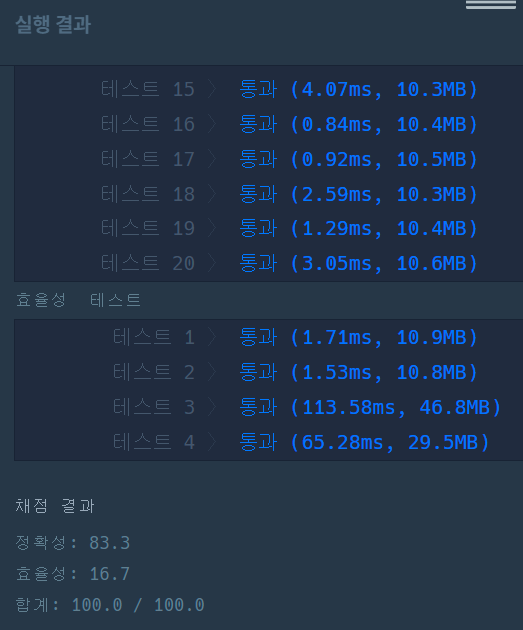